In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

In [2]:
#Генеририруем случайные данные  из нормального распределения с заданным средним и стандартным отклонением
np.random.seed(1)
group_1 = np.random.normal(loc=50, scale=10, size=100) #Группа 1: среднее = 50, стандартное отклонение = 10, размер = 100
#Генеририруем случайные данные для расчета долей 
np.random.seed(2)
group_2 = np.random.randint(0, 2, 100)

Среднее значение выборки с вероятностью 95.0% находится в диапазоне от       48.84 до 52.37


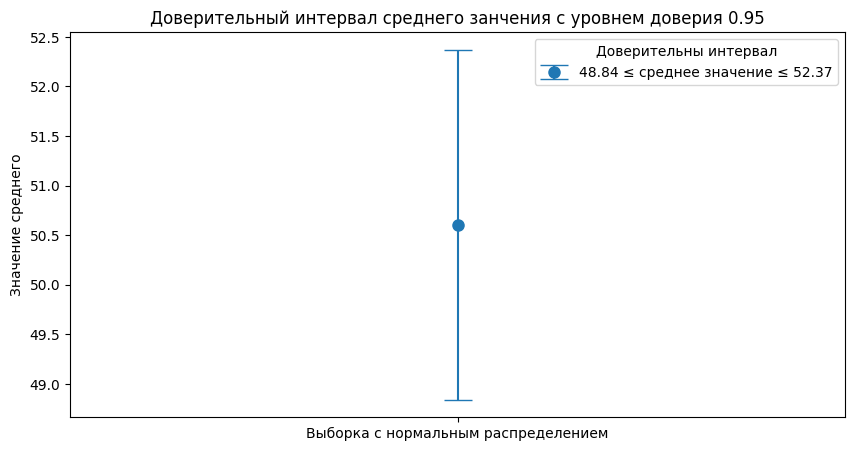

In [4]:
#Генеририруем случайные данные  из нормального распределения с заданным средним и стандартным отклонением
np.random.seed(1)
group_1 = np.random.normal(loc=50, scale=10, size=100) #Группа 1: среднее = 50, стандартное отклонение = 10, размер = 100
confidence_level = .95 #Уровень доврерия 95%
level_importance = 1 - confidence_level #Уровень значимости
n = len(group_1) # Размер выборки
mean_group_1 = np.mean(group_1) #Среднее
standard_deviation = np.std(group_1, ddof = 1) #Стандартное отклонение для выборки 
standart_error = standard_deviation/(n**.5) #Стандартная ошибка
critic_z  = np.abs(stats.t.ppf(level_importance / 2, n - 1)) #Критическое значение z
lower_bound_interval = mean_group_1 - standart_error * critic_z #Нижняя граница доверительного интревала
upper_bound_interval = mean_group_1 + standart_error * critic_z #Верхняя граница доверительного интревала
print(f'Среднее значение выборки с вероятностью {confidence_level * 100}% находится в диапазоне от \
      {lower_bound_interval:.2f} до {upper_bound_interval:.2f}')
# Визуализация доверительного интервал среднего значения
plt.figure(figsize = (10, 5))
plt.errorbar(1, mean_group_1, standart_error * critic_z, fmt='o', markersize=8, capsize=10,)
plt.legend(title='Доверительны интервал', labels=[f'{lower_bound_interval:.2f} ≤ среднее значение ≤ {upper_bound_interval:.2f}'])
plt.title(f'Доверительный интервал среднего занчения с уровнем доверия {confidence_level}')
plt.ylabel('Значение среднего')
plt.xticks([1], ['Выборка с нормальным распределением'])
plt.show()   


Доля успеха в выборке с вероятностью 95.0% находится в диапазоне от       0.46 до 0.66


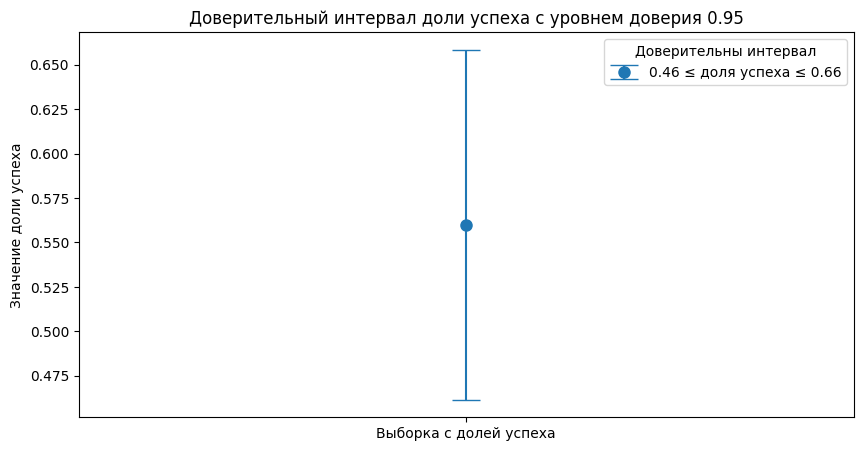

In [5]:
#Генеририруем случайные данные для расчета долей 
np.random.seed(42)
group_2 = np.random.randint(0, 2, 100)#Группа 2: знвчения 1 или 0, размер = 100
confidence_level = .95 #Уровень доврерия 95%
level_importance = 1 - confidence_level #Уровень значимости
n = len(group_1) # Размер выборки
unique, counts = np.unique(group_2, return_counts=True)#Определяем количество успехов и неудач
share_of_success = (dict(zip(unique, counts))).get(1) / 100 # доля успехов
se = np.sqrt(share_of_success * (1-share_of_success) / n)# Cтандартная ошибка доли 
critic_z  = np.abs(stats.t.ppf(level_importance / 2, n - 1)) #Критическое значение z
lower_bound_interval = share_of_success - se * critic_z #Нижняя граница доверительного интревала
upper_bound_interval = share_of_success + se * critic_z #Верхняя граница доверительного интревала
print(f'Доля успеха в выборке с вероятностью {confidence_level * 100}% находится в диапазоне от \
      {lower_bound_interval:.2f} до {upper_bound_interval:.2f}')
# Визуализация доверительного интервал доли
plt.figure(figsize = (10, 5))
plt.errorbar(1, share_of_success, se * critic_z, fmt='o', markersize=8, capsize=10,)
plt.legend(title='Доверительны интервал', labels=[f'{lower_bound_interval:.2f} ≤ доля успеха ≤ {upper_bound_interval:.2f}'])
plt.title(f'Доверительный интервал доли успеха с уровнем доверия {confidence_level}')
plt.ylabel('Значение доли успеха')
plt.xticks([1], ['Выборка с долей успеха'])
plt.show()    


Вывод:

Среднее значение выборки с вероятностью 95.0% находится в диапазоне от  48.84 до 52.37

Доля успеха в выборке с вероятностью 95.0% находится в диапазоне от  0.46 до 0.66